In [128]:
from statsmodels.tsa import arima_process, stattools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics import tsaplots
from statsmodels.api import stats
import plotly.express as px
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

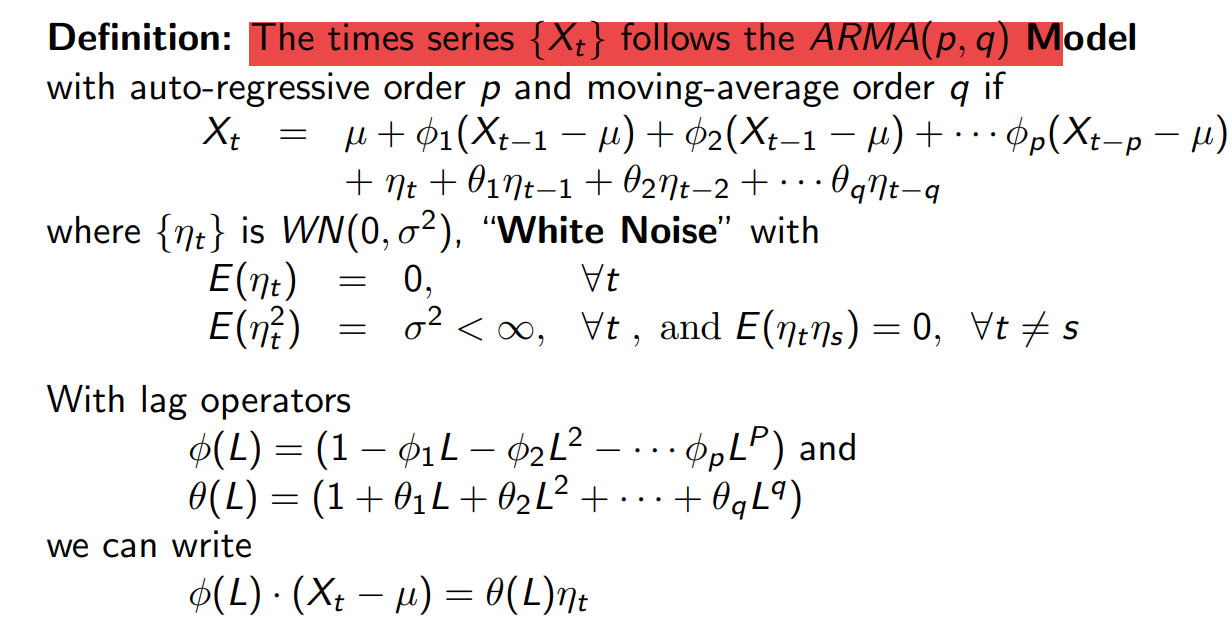

### 1. Simulated autoregressive process

In [120]:
x = arima_process.arma_generate_sample(ar=[1, -0.8], ma=[1], nsample=1000)

px.line(x)

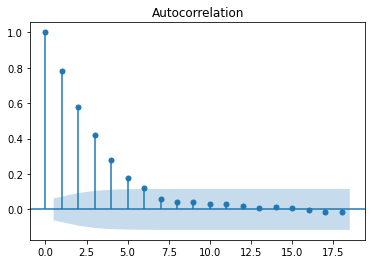

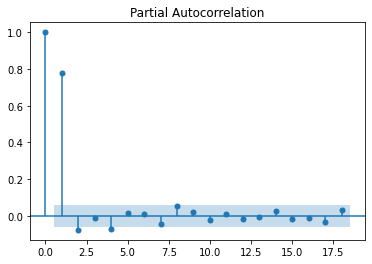

In [38]:
tsaplots.plot_acf(x, lags=18); tsaplots.plot_pacf(x, lags=18);

H0: The residuals are independently distributed.

HA: The residuals are not independently distributed; they exhibit serial correlation.

In [33]:
stats.acorr_ljungbox(x, lags=5, return_df=True)

,lb_stat,lb_pvalue
1,607.812421,3.346211e-134
2,941.015916,4.581315e-205
3,1118.091277,4.326439e-242
4,1195.177891,1.768264e-257
5,1227.653607,3.005383e-263


In [83]:
res_acf = stattools.acf(x, fft=True, qstat=True, nlags=10)

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("acf", "qstat", "pvalues"))
fig.add_trace(
    go.Scatter(x=[i for i in range(len(res_acf[0]))],y=res_acf[0]),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=[i for i in range(len(res_acf[1]))], y=res_acf[1]),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=[i for i in range(len(res_acf[2]))],y=res_acf[2]),
    row=1, col=3
)

In [122]:
ar_model = AutoReg(x, lags=1, old_names=False).fit()

ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     AutoReg(1)   Log Likelihood               -1373.951
Method:               Conditional MLE   S.D. of innovations              0.957
Date:                Sat, 28 May 2022   AIC                             -0.081
Time:                        13:44:53   BIC                             -0.066
Sample:                             1   HQIC                            -0.076
                                 1000                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0225      0.030      0.742      0.458      -0.037       0.082
y.L1           0.8152      0.018     44.434      0.000       0.779       0.851
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2267           +0.0000j            1.2267            0.0000
-----------------------------------------------------------------------------
"""

In [121]:
ar_model = ARIMA(endog=x, order=(1,0,0), trend='n').fit()

ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1375.655
Date:                Sat, 28 May 2022   AIC                           2755.310
Time:                        13:44:25   BIC                           2765.125
Sample:                             0   HQIC                          2759.040
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8154      0.019     42.580      0.000       0.778       0.853
sigma2         0.9161      0.042     21.980      0.000       0.834       0.998
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.72   Prob(JB):                         0.65
Heteroskedasticity (H):               1.04   Skew:                             0.06
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
px.line(ar_model.resid)

In [100]:
res_acf = stattools.acf(ar_model.resid, fft=True, qstat=True, nlags=10)

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("acf", "qstat", "pvalues"))
fig.add_trace(
    go.Scatter(x=[i for i in range(len(res_acf[0]))],y=res_acf[0]),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=[i for i in range(len(res_acf[1]))], y=res_acf[1]),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=[i for i in range(len(res_acf[2]))],y=res_acf[2]),
    row=1, col=3
)

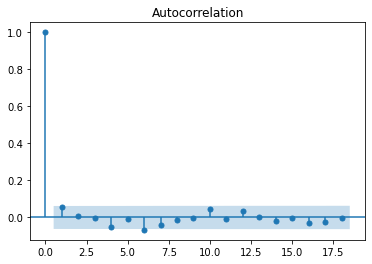

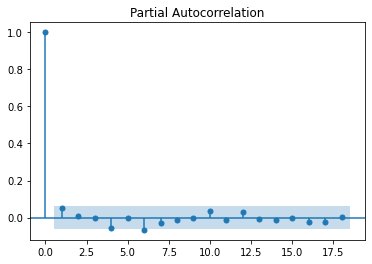

In [101]:
tsaplots.plot_acf(ar_model.resid, lags=18); tsaplots.plot_pacf(ar_model.resid, lags=18);

### Build acf_plots for AR(p) for different p and for range of coef

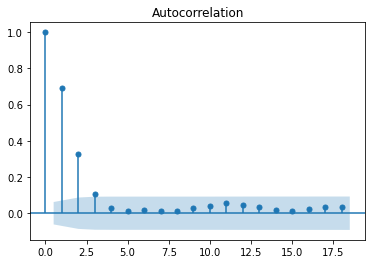

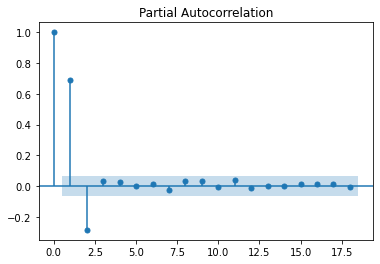

In [114]:
x = arima_process.arma_generate_sample(ar=[1, -0.9, 0.3], ma=[1], nsample=1000)
tsaplots.plot_acf(x, lags=18); tsaplots.plot_pacf(x, lags=18);

### 2. Simulated moving average process

In [123]:
x = arima_process.arma_generate_sample(ar=[1], ma=[1, .8], nsample=1000)

px.line(x)

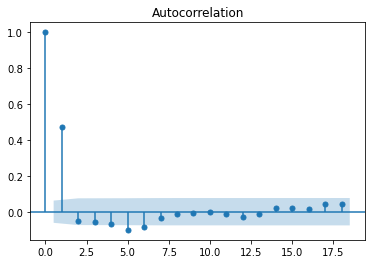

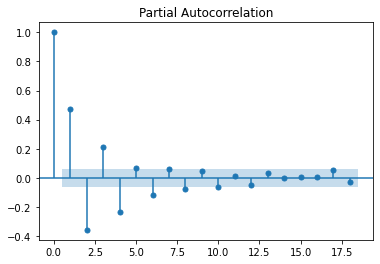

In [124]:
tsaplots.plot_acf(x, lags=18); tsaplots.plot_pacf(x, lags=18);

In [125]:
ma_model = ARIMA(endog=x, order=(0,0,1), trend='n').fit()

ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1458.977
Date:                Sat, 28 May 2022   AIC                           2921.953
Time:                        13:46:27   BIC                           2931.769
Sample:                             0   HQIC                          2925.684
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8137      0.019     43.926      0.000       0.777       0.850
sigma2         1.0822      0.050     21.447      0.000       0.983       1.181
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.82   Prob(JB):                         0.60
Heteroskedasticity (H):               0.87   Skew:                            -0.01
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

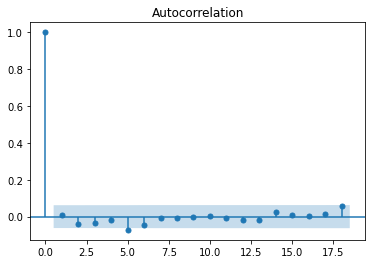

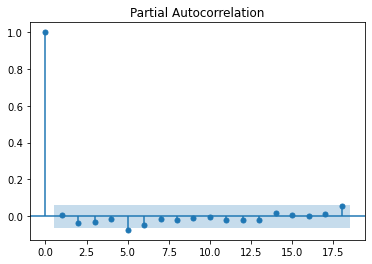

In [126]:
tsaplots.plot_acf(ma_model.resid, lags=18); tsaplots.plot_pacf(ma_model.resid, lags=18);

### Build acf_plots for MA(q) for different q and for range of coef

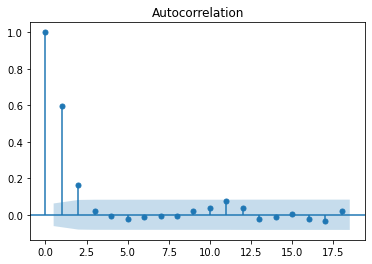

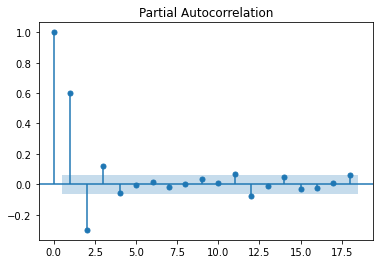

In [127]:
x = arima_process.arma_generate_sample(ar=[1], ma=[1, 0.8, 0.2], nsample=1000)
tsaplots.plot_acf(x, lags=18); tsaplots.plot_pacf(x, lags=18);

### Simulate ARMA process and find right params using AIC

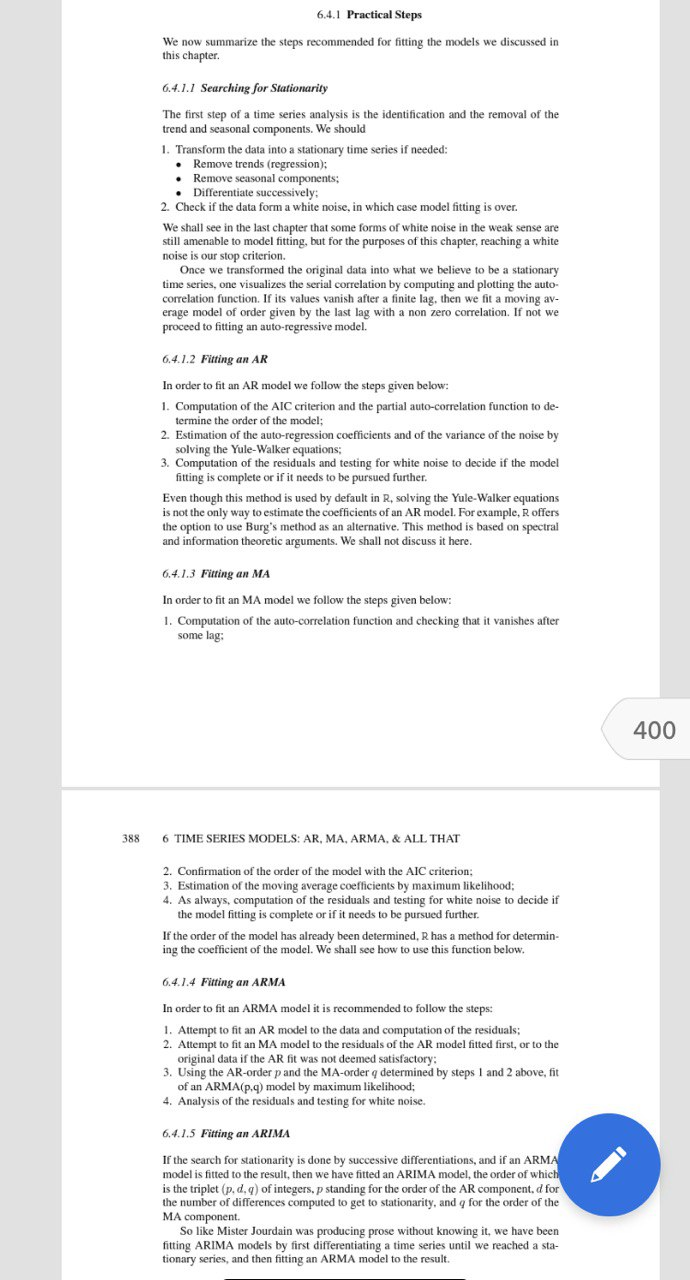

### ARIMA model
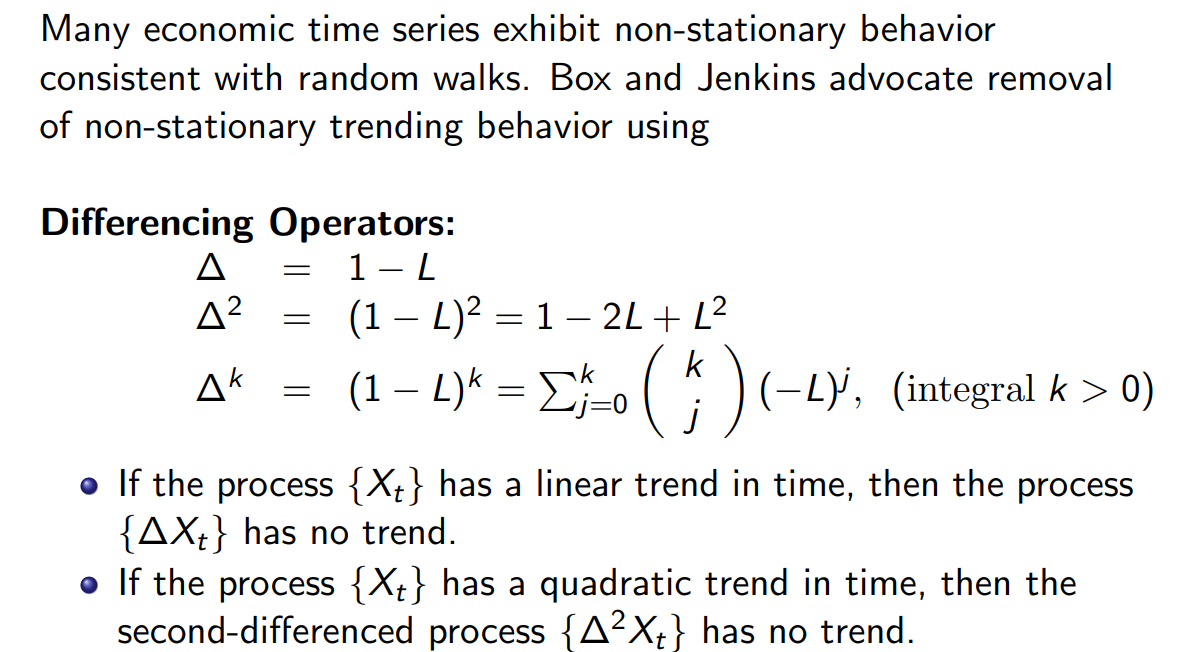


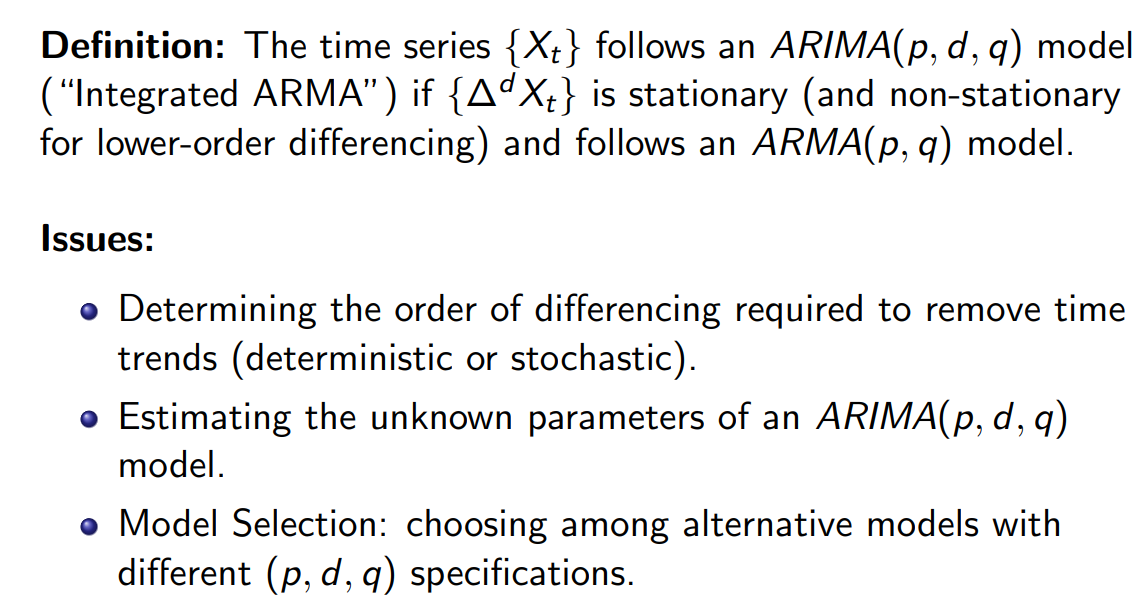

Mark that the conditional variance is the constant!